# Pymaceuticals Inc.
---

### Analysis

- Once duplicates were removed the mouse population = 248 (N = 248).  Sex breakdown is 123 Female and 125 Male mice.  Capomulin and Ramicane are the two most used drugs in treatment with Propriva being used the least.  The success of the Capomulin treatment is evidenced in the line chart of mouse y793 as an example. 

- With a correlation of 0.84, there is a strong positive correlation between weight and average tumor volume in the mice. Capomulin and Ramicane were also the most successful drugs in reducing the size of the tumors within the mice subjects and consequently the most used drugs in this study as evidenced in the bar graph.

- There was a significant outlier found in the Infubinol drug treatment regime with a final tumor volume of 36.32 that is far outside the whisker bounds.


In [1]:
#matplotlib widget

# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_df = pd.merge(mouse_metadata, study_results, how="left", on=["Mouse ID"])

# Display the data table for preview
mouse_df.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
mouse_df['Mouse ID'].nunique()

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
mouse_dupes = mouse_df[mouse_df[['Mouse ID', 'Timepoint']].duplicated() == True] #.groupby(mouse_df['Mouse ID'])['Mouse ID'].unique()
mouse_dupes = mouse_dupes['Mouse ID'].unique()
mouse_dupes


array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 

#IM just selecting the first vlaue of the array, but what if there was mutliple values? ???
df = mouse_df.loc[mouse_df['Mouse ID'] == mouse_dupes[0]]
df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [4]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mouse_df = mouse_df[mouse_df['Mouse ID'] != 'g989']


In [5]:
# Checking the number of mice in the clean DataFrame.
mouse_df['Mouse ID'].nunique()

248

## Summary Statistics

In [6]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

means = mouse_df.groupby('Drug Regimen').mean()['Tumor Volume (mm3)']
medians = mouse_df.groupby('Drug Regimen').median()['Tumor Volume (mm3)']
var = mouse_df.groupby('Drug Regimen').var()['Tumor Volume (mm3)']
standards = mouse_df.groupby('Drug Regimen').std()['Tumor Volume (mm3)']
sem = mouse_df.groupby('Drug Regimen').sem()['Tumor Volume (mm3)']

dr_stats = pd.DataFrame(means)
dr_stats = dr_stats.rename(columns={"Tumor Volume (mm3)": "Mean Tumor Volume"})

dr_stats["Median Tumor Volume"] = medians
dr_stats["Tumor Volume Variance"] = var
dr_stats["Tumor Volume Std. Dev."] = standards
dr_stats["Tumor Volume Std. Err."] = sem

dr_stats

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line.
drug_regimen_df = mouse_df.drop(['Mouse ID', 'Sex'], axis=1).groupby(['Drug Regimen'])
dr_stats = drug_regimen_df.agg(['mean','median','var','std','sem'])["Tumor Volume (mm3)"]
dr_stats.rename(columns={'mean': 'Mean Tumor Volume',
                        'median': 'Median Tumor Volume',
                        'var': 'Tumor Volume Variance',
                        'std': 'umor Volume Std. Dev.	',
                        'sem': 'Tumor Volume Std. Err.'}, inplace=True)
dr_stats

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,umor Volume Std. Dev.\t,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

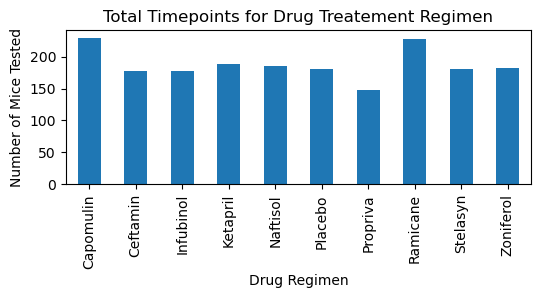

<Figure size 640x480 with 0 Axes>

In [26]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

# Filter the DataFrame down only to those columns to chart
drugs_timepoints = mouse_df.groupby('Drug Regimen').count()['Timepoint']

#create the bar chart
drugs_timepoints.plot(kind='bar', figsize=(6,2))
plt.title("Total Timepoints for Drug Treatement Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")

#show
plt.show()
plt.tight_layout()


<Figure size 640x480 with 0 Axes>

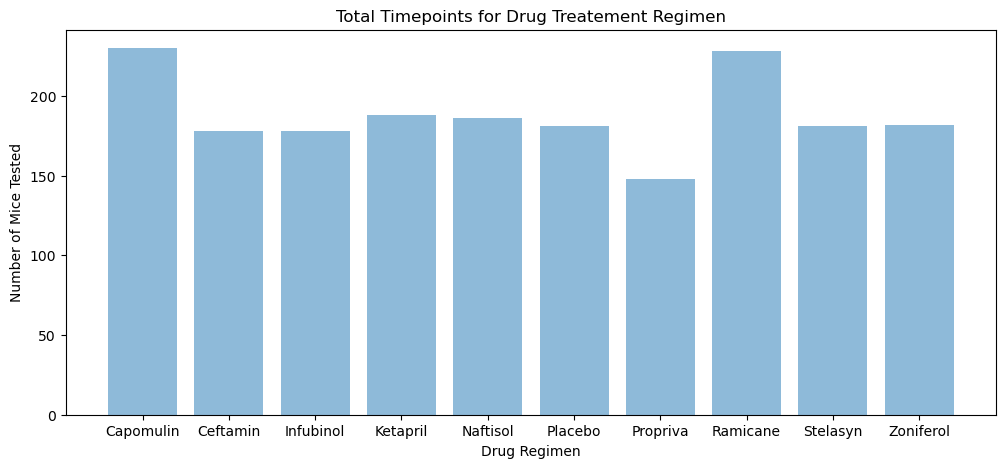

In [38]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

#reset index
drugs_timepoints = drugs_timepoints.reset_index()

#assign to axis
y_axis = drugs_timepoints['Timepoint']
x_axis = drugs_timepoints['Drug Regimen']

plt.clf()  #clear Pyplot figure

#create barchart using plotly
fig = plt.figure(figsize=(12, 5))
plt.bar(x_axis, y_axis, color='b', alpha=0.5, align="center")
plt.title("Total Timepoints for Drug Treatement Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")
plt.show()

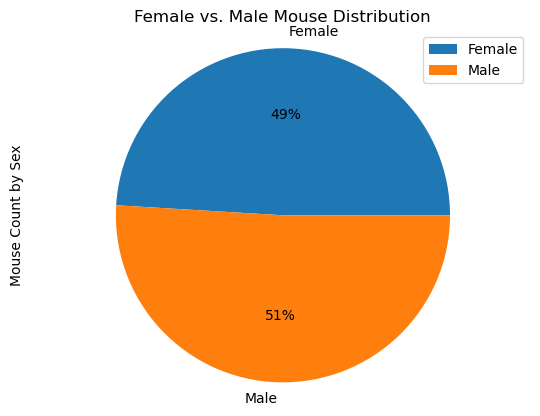

In [28]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

#get mouse gender count
gender = mouse_df.groupby('Sex').count()

# Plotting the pie chart for above dataframe in Pandas
pie = gender.plot(kind='pie', y='Mouse ID', title='Female vs. Male Mouse Distribution', autopct='%1.0f%%')
pie.set_ylabel('Mouse Count by Sex')
plt.axis("equal")
plt.show()

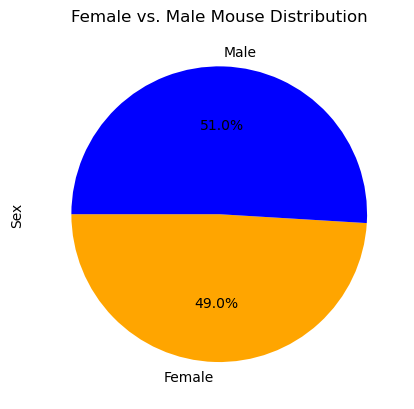

In [29]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

#get mouse gender count
gender = mouse_df.groupby('Sex').count()

labels = list(gender.index)
sizes = gender["Mouse ID"]

# The colors of each section of the pie chart
colors = ["orange", "blue"]

#create pie chart
plt.clf()  #clear Pyplot figure
plt.pie(sizes, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=False, startangle=180)
plt.title('Female vs. Male Mouse Distribution')
plt.ylabel('Sex')

plt.savefig('mouse_gender_pie')
plt.show()


## Quartiles, Outliers and Boxplots

In [30]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
last_timepoint = mouse_df.groupby(['Mouse ID'])['Timepoint'].max()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
#last_tumor_vol = mouse_df.groupby(['Drug Regimen', 'Mouse ID']).last()['Tumor Volume (mm3)']   Easier Alternative?

merged_data_last = pd.merge(last_timepoint, mouse_df, how="left", on=("Mouse ID","Timepoint"))
merged_data_last.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1


In [31]:
#Locate the rows which contain mice on each drug and get the tumor volumes
#for loop.  Loop through drugs in treatment list, filter the df and append 
#"final tumor volumes for each drug into the empty list" as I loop through 
# the four drugs in the treatment list 
        
#I can filter DF by using loc['drugname']
#to filter the rows and then sum? tumor volumes and add to empty tumor_vol_data list. 
#or can do a groupby on the filtered data set and sum() it to get total vol data? 

# Put treatments into a list for for loop (and later for plot labels)
treatment_list = ['Capomulin', 'Ramicane', 'Infubinol','Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
# Locate the rows which contain mice on each drug and get the tumor volumes
for drug in treatment_list:
    tumor_vol = merged_data_last.loc[merged_data_last['Drug Regimen'] == drug, "Tumor Volume (mm3)"]
    
    # add subset 
    tumor_vol_data.append(tumor_vol)
    
    # Determine outliers using upper and lower bounds
    quartiles = tumor_vol.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq

    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outliers = tumor_vol.loc[(tumor_vol < lower_bound) | (tumor_vol > upper_bound)]

    print(f"{drug}'s potential outliers: {outliers}")
    

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


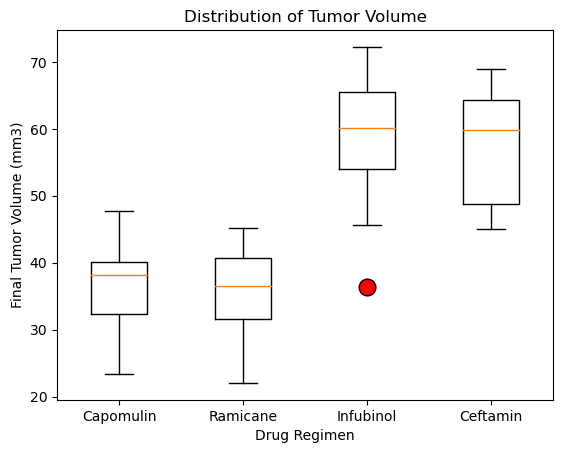

In [32]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
# trick to rendering mutliple box plots is in the preivous cell and how data is stored

fig1, ax = plt.subplots()
ax.set_title('Distribution of Tumor Volume')
ax.set_ylabel('Final Tumor Volume (mm3)')
ax.set_xlabel('Drug Regimen')
flierprops = dict(marker='o', markerfacecolor='r', markersize=12, markeredgecolor='k')
ax.boxplot(tumor_vol_data, labels=treatment_list, flierprops=flierprops)
plt.show()

## Line and Scatter Plots

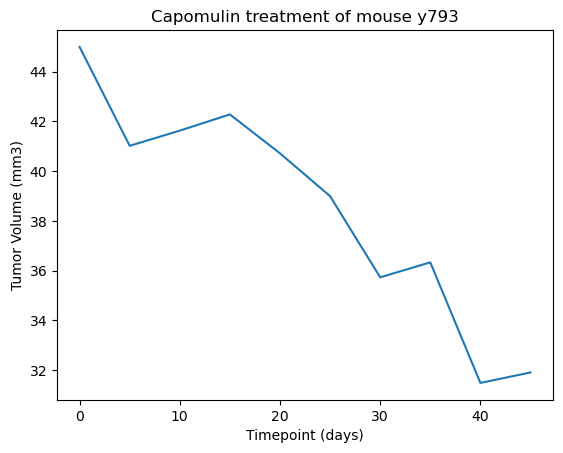

In [33]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
capomulin_df = mouse_df.loc[mouse_df["Drug Regimen"] == "Capomulin",:]

# 1. Select a mouse that was treated with Capomulin
capomulin_mouse = capomulin_df.loc[capomulin_df["Mouse ID"] == "y793",:]
mouse_number = capomulin_mouse['Mouse ID'].unique()

# Generate a line plot of tumor volume over time
x_axis = capomulin_mouse['Timepoint']
y_axis = capomulin_mouse['Tumor Volume (mm3)']

plt.clf()  #clear Pyplot figure

plt.title(f"Capomulin treatment of mouse {mouse_number[0]}")
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.plot(x_axis, y_axis)

# Show the graph that we have created
plt.show()

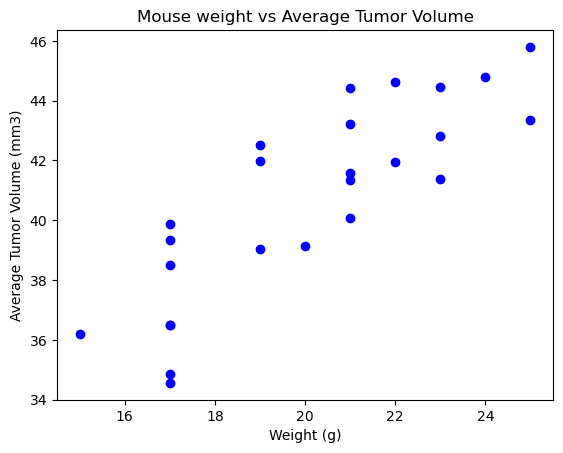

In [34]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
avg_tumor_vol = capomulin_df.groupby(['Mouse ID']).mean()

# Generate a line plot of tumor volume over time
x_axis = avg_tumor_vol['Weight (g)']
y_axis = avg_tumor_vol['Tumor Volume (mm3)']

plt.clf()  #clear Pyplot figure

plt.scatter(x_axis,y_axis, color="blue")
plt.title("Mouse weight vs Average Tumor Volume")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")

# Show the graph that we have created
plt.show()


## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


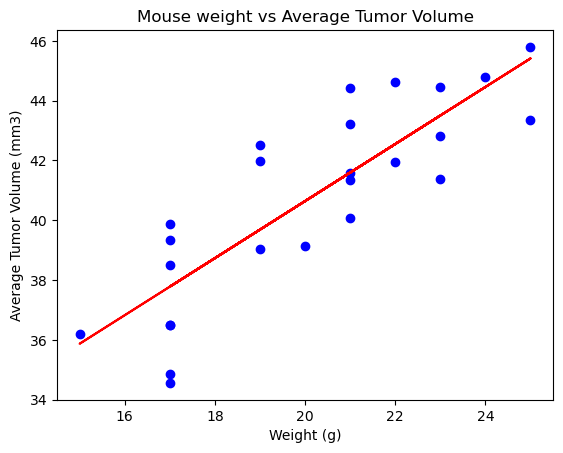

In [35]:
# Calculate the correlation coefficient for mouse weight and average tumor volume for the Capomulin regimen
print(f'The correlation between mouse weight and the average tumor volume is {round(st.pearsonr(x_axis,y_axis)[0],2)}') 

# Calculate the linear regression model for mouse weight and average tumor volume for the Capomulin regimen
slope, int, r, p, std_err = st.linregress(x_axis, y_axis)
regress_value = x_axis * slope + int

# Generate a line plot of tumor volume over time
x_axis = avg_tumor_vol['Weight (g)']
y_axis = avg_tumor_vol['Tumor Volume (mm3)']

plt.clf()  #clear Pyplot figure

plt.scatter(x_axis,y_axis, color="blue")
plt.plot(x_axis,regress_value,"r-")
plt.title("Mouse weight vs Average Tumor Volume")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")

# Show the graph that we have created
plt.show()